## 필요한 라이브러리 설치

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [ ]:
import tensorflow.keras.utils

## 데이터 로드

In [ ]:
# %%time
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/train.zip",'r') as z:
    z.extractall(".")
with zipfile.ZipFile("/content/drive/MyDrive/test1.zip",'r') as z:
    z.extractall(".")

## 카테고리화 ( dog:1, cat:0 )

In [ ]:
filenames = os.listdir('/content/train')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(str(1))
    else:
        categories.append(str(0))

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df.head()

,filename,category
0,cat.9534.jpg,0
1,dog.10080.jpg,1
2,dog.10332.jpg,1
3,cat.2535.jpg,0
4,dog.4696.jpg,1


## 이미지 확인

## 데이터 분포 확인

In [ ]:
df["category"].value_counts()

0    12500
1    12500
Name: category, dtype: int64

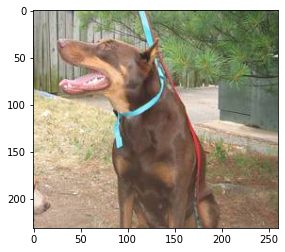

In [ ]:
import random
from tensorflow.keras.utils import load_img
# from keras.preprocessing.text import
sample = random.choice(filenames)
image = load_img("/content/train/"+sample)
plt.imshow(image)

## train 데이터와 valid 데이터로 분할

In [ ]:
x_train, x_val = train_test_split(df, test_size=0.2, random_state=2)
x_train.head(), x_val.head()

(            filename category
 18687  dog.11784.jpg        1
 127     dog.2574.jpg        1
 24837   dog.1560.jpg        1
 7286   cat.12324.jpg        0
 22021   dog.1764.jpg        1,            filename category
 15050  cat.2390.jpg        0
 9386   cat.1594.jpg        0
 486    cat.3627.jpg        0
 12924  dog.5696.jpg        1
 16897    dog.76.jpg        1)

In [ ]:
x_train = x_train.reset_index(drop=True)
x_val = x_val.reset_index(drop=True)

In [ ]:
print(x_train.shape)
print(x_val.shape)

(20000, 2)
(5000, 2)


## 데이터 처리

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,             # 임의로 사진 회전
    width_shift_range=0.1,         # 전체 크기의 0.1 가로 이동
    height_shift_range=0.1,        # 전체 크기의 0.1 세로 이동
    shear_range=0.1,
    zoom_range=0.2,                # 랜덤 이미지 확대 범위
    horizontal_flip=True,          # 랜덤 이미지 수평 회전
    rescale=1./255)                # 가장 후처리 연산. 0~1로 변환


valid_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255)

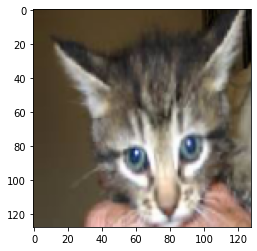

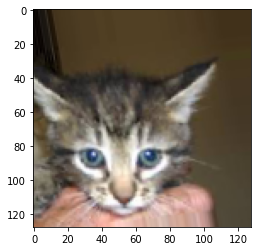

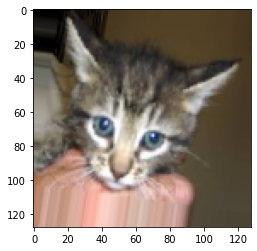

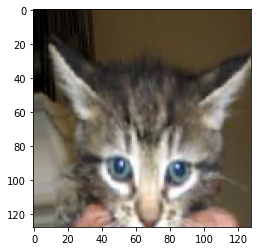

In [ ]:
from tensorflow.keras.preprocessing import image
fnames = [os.path.join('/content/train', filename) for filename in os.listdir('/content/train')]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(128, 128))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in train_datagen.flow(x, batch_size=1):
 plt.figure(i)
 imgplot = plt.imshow(image.array_to_img(batch[0]))
 i += 1
 if i % 4 == 0:
        break
plt.show()

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    x_train,
    "/content/train", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
 )

valid_generator = valid_datagen.flow_from_dataframe( 
    x_val,
    "/content/train", 
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
 )

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


## 형태 확인

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (15, 128, 128, 3)
labels batch shape: (15, 2)


In [ ]:
for data_batch, labels_batch in valid_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (15, 128, 128, 3)
labels batch shape: (15, 2)


## CNN 모델 구현

In [ ]:
from keras.layers import  BatchNormalization
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization,AveragePooling2D

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 32)       128       
 hNormalization)                                                 
                                                        

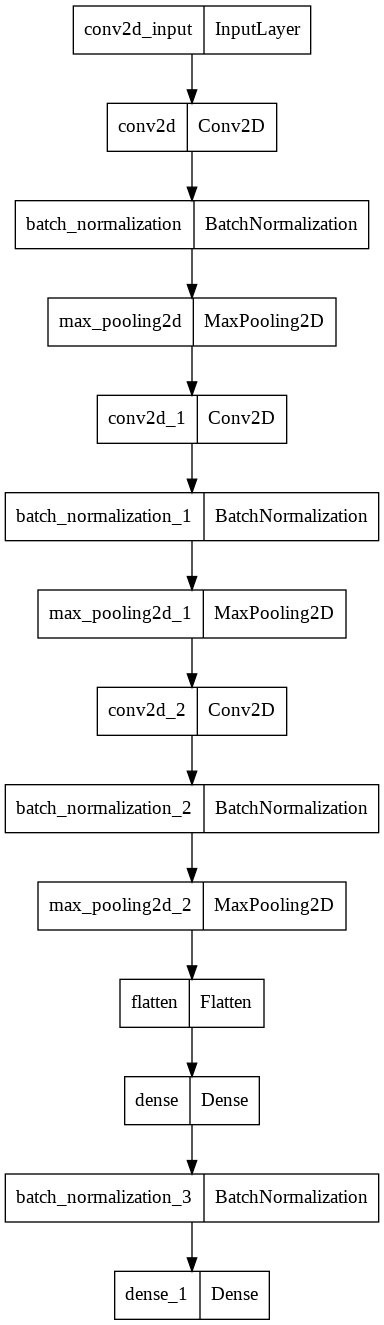

In [ ]:
keras.utils.plot_model(model)

## Compile Model

In [ ]:
from tensorflow.keras.optimizers import Adam 
adam = Adam(learning_rate=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

## Fit Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
model.save('cats_and_dogs_2.h5')
checkpointer = ModelCheckpoint(filepath = model.save, monitor = 'val_loss',
verbose =1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

In [ ]:
history = model.fit(train_generator, epochs=30, verbose=1, validation_data=valid_generator)

Epoch 1/30
1334/1334 [==============================] - 810s 606ms/step - loss: 0.7130 - accuracy: 0.6664 - val_loss: 0.5727 - val_accuracy: 0.7270
Epoch 2/30
1334/1334 [==============================] - 795s 596ms/step - loss: 0.5684 - accuracy: 0.7135 - val_loss: 0.5190 - val_accuracy: 0.7464
Epoch 3/30
1334/1334 [==============================] - 795s 596ms/step - loss: 0.5320 - accuracy: 0.7365 - val_loss: 0.5189 - val_accuracy: 0.7492
Epoch 4/30
1334/1334 [==============================] - 800s 599ms/step - loss: 0.5049 - accuracy: 0.7534 - val_loss: 0.4861 - val_accuracy: 0.7702
Epoch 5/30
1334/1334 [==============================] - 810s 607ms/step - loss: 0.4894 - accuracy: 0.7638 - val_loss: 0.4752 - val_accuracy: 0.7788
Epoch 6/30
1334/1334 [==============================] - 806s 604ms/step - loss: 0.4715 - accuracy: 0.7745 - val_loss: 0.5108 - val_accuracy: 0.7526
Epoch 7/30
1334/1334 [==============================] - 793s 594ms/step - loss: 0.4509 - accuracy: 0.7861 - val_

## 모델 저장

## Accuracy, Loss 확인

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

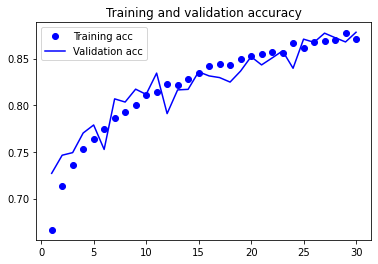

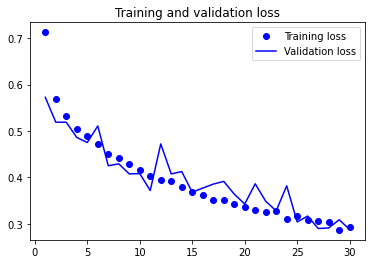

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()